1.  	Dataset yang digunakan untuk mengklasifikasi gambar apa ?
Jawab : Klasifikasi gambar daun, bunga dan sayur
2.  	Sebutkan jumlah image pada masing – masing kelas ?
Jawab : 240 Image
3.  	Dataset dibagi menjadi berapa Folder dan berapa jumlah masing -  masing ?
Jawab : 80 Image per Folder
4.  	Berapa Batch size yang digunakan ?
Jawab : 4
5.  	Image dataset diubah menjadi ukuran berapa sebelum dilakukan convolution ?
Jawab : 150 150
6.  	Berapa jumlah iterasi yang digunakan ?
Jawab : 25
7.  	sebutkan augmentasi apa saja yang dilakukan dalam pipeline source code yang anda kerjakan ?
Jawab : rescale, geser,rotasi,dan horizontal flip
8.  	sebutkam model layer yang digunakan pada tugas anda ?
Jawab : Conv2D,Drop Out, dan MaxPooling2D
9.  	optimizer yang digunakan pada tugas anda ?
Jawab : Adam
10.   Berapa total parameter yang digunakan dan parameter yang ditrain ?
Jawab : 6 Parameter
11.   Sebutkan accuracy dan loss pada epoch terakhir ?
Jawab : 0.7500
12.   Sebutkan accuracy yang tertinggi dan epoch ke berapa ?
Jawab : 0.9167, epoch ke 16
13.   Apakah prediksi gambar yang dilakukan sudah benar ?
Jawab : Benar

**Eksperimen**
-        No 1
-        80% train : 10% val : 10% test,  => 0.8333,
-        70% train : 15% val : 15% test, => 0.9167,
-        80% train : 20% val, => 0.7500
-        70% train : 30% => 0.7500

-        No 2 Augmentasi Data => zoom, rescale, geser,rotasi, width_shift_range,horizontal flip dan height_shift_range => 0.7143

-        No 3 Batch Size
-           - Batch Size = 3(1.0000)
-           - Batch Size = 7(0.7619)

In [69]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [70]:
BATCH_SIZE = 7

In [71]:
#membuat base direktori dan mengeceknya
base_dir = '../input/orang-puh-laki-kel-24/TRAIN'
os.listdir(base_dir)

['tempat minum', 'tempat soup', 'tempat makan']

In [72]:
# membuat direktori batu
rock_dir = os.path.join(base_dir, 'tempat makan')

# membuat direktori gunting
scissors_dir = os.path.join(base_dir, 'tempat minum')

# membuat direktori kertas
paper_dir = os.path.join(base_dir, 'tempat soup')

In [73]:
#cek jumlah gambar batu
print('total training rock images:', len(os.listdir(rock_dir)))
#cek jumlah gambar gunting
print('total training scissors images:', len(os.listdir(scissors_dir)))
#cek jumlah gambar kertas
print('total training paper images:', len(os.listdir(paper_dir)))

total training rock images: 80
total training scissors images: 80
total training paper images: 80


In [74]:
#train datagen
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest',
    validation_split=0.1)

In [75]:
#train generator dan validation generator
train_dir = '../input/orang-puh-laki-kel-24/TRAIN'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training') # set as training data


valid_dir = '../input/orang-puh-laki-kel-24/VALIDATION'
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 216 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [76]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

#ringkasan dari model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 128)      

In [77]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(
    train_generator, 
    epochs=25, 
    steps_per_epoch=25, 
    validation_data = validation_generator, 
    verbose = 1, 
    validation_steps=3)

Epoch 1/25
25/25 [==============================] - 10s 359ms/step - loss: 1.2533 - accuracy: 0.3851 - val_loss: 0.7937 - val_accuracy: 0.6667
Epoch 2/25
25/25 [==============================] - 8s 313ms/step - loss: 0.9527 - accuracy: 0.5747 - val_loss: 0.8747 - val_accuracy: 0.6190
Epoch 3/25
25/25 [==============================] - 8s 311ms/step - loss: 0.8920 - accuracy: 0.5575 - val_loss: 0.7093 - val_accuracy: 0.6667
Epoch 4/25
25/25 [==============================] - 8s 325ms/step - loss: 0.9033 - accuracy: 0.6286 - val_loss: 0.6283 - val_accuracy: 0.7143
Epoch 5/25
25/25 [==============================] - 8s 314ms/step - loss: 0.6359 - accuracy: 0.7184 - val_loss: 0.7324 - val_accuracy: 0.7143
Epoch 6/25
25/25 [==============================] - 7s 297ms/step - loss: 0.7201 - accuracy: 0.6954 - val_loss: 0.6066 - val_accuracy: 0.7619
Epoch 7/25
25/25 [==============================] - 8s 319ms/step - loss: 0.5649 - accuracy: 0.7931 - val_loss: 0.2477 - val_accuracy: 0.9048
Epoch

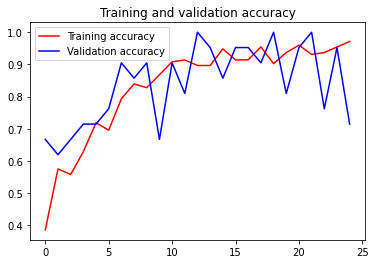

<Figure size 432x288 with 0 Axes>

In [78]:
#buat grafik akurasi
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [79]:
list_class = os.listdir(base_dir)
list_class.sort()
list_class

['tempat makan', 'tempat minum', 'tempat soup']

2


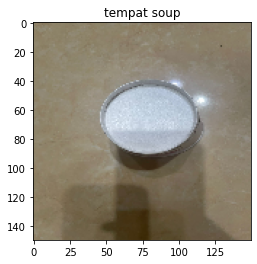

1


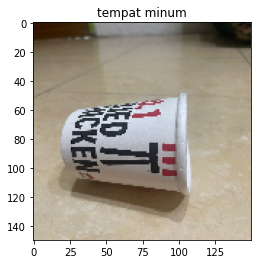

2


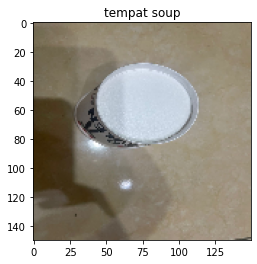

2


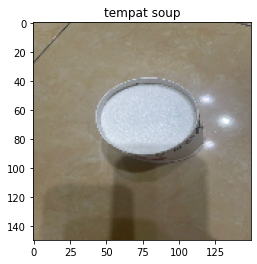

2


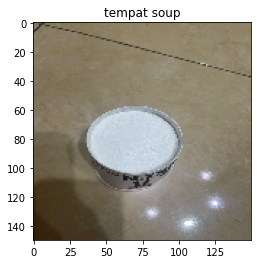

2


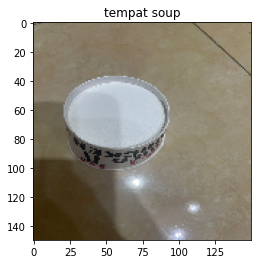

2


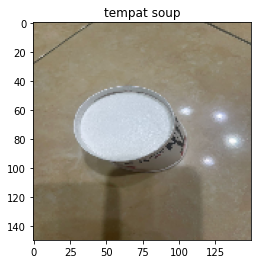

2


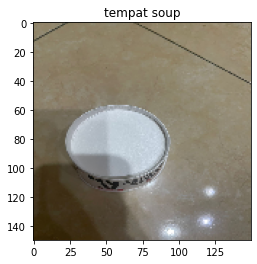

2


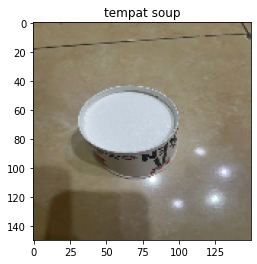

2


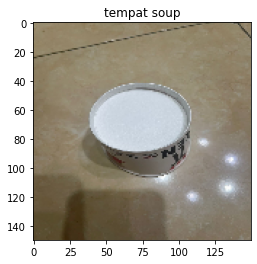

In [80]:
testes = '../input/orang-puh-laki-kel-24/TEST/TEMPAT SOUP'
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = os.listdir(testes)
path = []
for fn in uploaded:
  path.append(fn)

for obj in path:
  patoh = os.path.join(testes,obj)
  img = image.load_img(patoh, target_size=(150, 150, 3))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=BATCH_SIZE)
  class_index = np.argmax(classes)
  class_indeks = int(class_index)
  pred = list_class[class_indeks]
  print(class_indeks)
  plt.imshow(img)
  plt.title(pred)
  plt.show()